In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier#importing ML classes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading and displaying dataset values
dataset = pd.read_csv("Dataset/traffic_data.csv")
dataset

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,x,y,direction,congestion
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,0,0,EB,70
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,0,0,NB,49
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,0,0,SB,24
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,0,1,EB,18
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,0,1,NB,60
...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,1,3,NB,58
48200,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,1,3,NE,50
48201,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,1,3,SB,63
48202,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1,3,SW,34


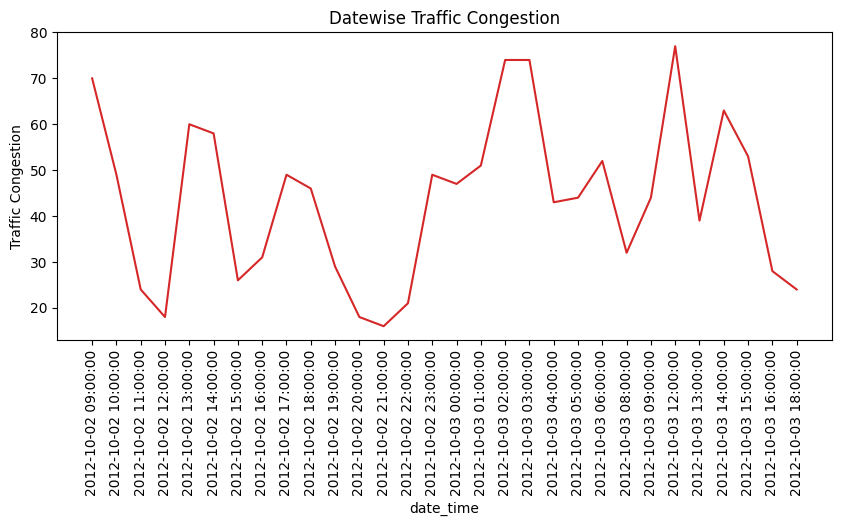

In [3]:
#plotting graph of traffic flow in different dates
#dataset['time'] = pd.to_datetime(dataset['time'], infer_datetime_format=True)
plt.figure(figsize=(10,4), dpi=100)
plt.plot(dataset.date_time[0:30], dataset.congestion[0:30], color='tab:red')
plt.gca().set(title="Datewise Traffic Congestion", xlabel='date_time', ylabel="Traffic Congestion")
plt.xticks(rotation=90)
plt.show()

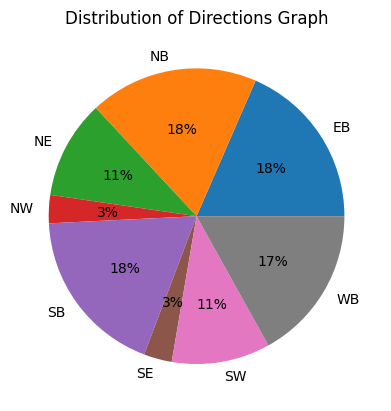

In [4]:
#graphs of different weather condition found in dataset
weather = dataset['direction'].ravel() #extracting weather data
labels, count = np.unique(weather, return_counts=True)
plt.pie(count, labels = labels, autopct='%.0f%%')
plt.title("Distribution of Directions Graph")
plt.show() 

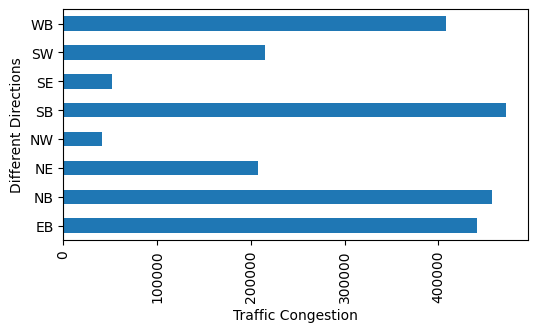

In [5]:
dataset.groupby(['direction'])['congestion'].sum().plot.barh(figsize=(6,3))
plt.xlabel('Traffic Congestion')
plt.ylabel("Different Directions")
plt.xticks(rotation=90)
plt.show()

In [6]:
#finding and displaying any missing or null values
dataset.isnull().sum()

temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
x                      0
y                      0
direction              0
congestion             0
dtype: int64

In [7]:
#now convert date column as numeric features by separting them into year, month, day, hour, second and minutes
dataset['date_time'] = pd.to_datetime(dataset['date_time'])
dataset['year'] = dataset['date_time'].dt.year
dataset['month'] = dataset['date_time'].dt.month
dataset['day'] = dataset['date_time'].dt.day
dataset['hour'] = dataset['date_time'].dt.hour
dataset['minute'] = dataset['date_time'].dt.minute
dataset['second'] = dataset['date_time'].dt.second
dataset

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,x,y,direction,congestion,year,month,day,hour,minute,second
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,0,0,EB,70,2012,10,2,9,0,0
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,0,0,NB,49,2012,10,2,10,0,0
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,0,0,SB,24,2012,10,2,11,0,0
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,0,1,EB,18,2012,10,2,12,0,0
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,0,1,NB,60,2012,10,2,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,1,3,NB,58,2018,9,30,19,0,0
48200,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,1,3,NE,50,2018,9,30,20,0,0
48201,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,1,3,SB,63,2018,9,30,21,0,0
48202,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1,3,SW,34,2018,9,30,22,0,0


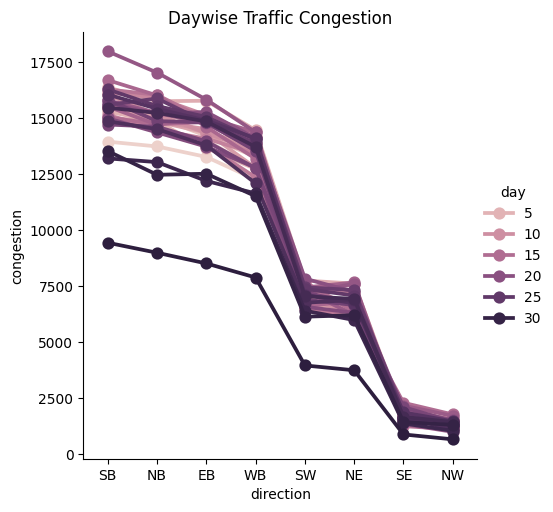

In [8]:
#channels which recive highest comments
data = dataset.groupby(['direction', 'day'])['congestion'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x="direction", y="congestion", hue='day', data=data, kind='point')
plt.title("Daywise Traffic Congestion")
plt.show()

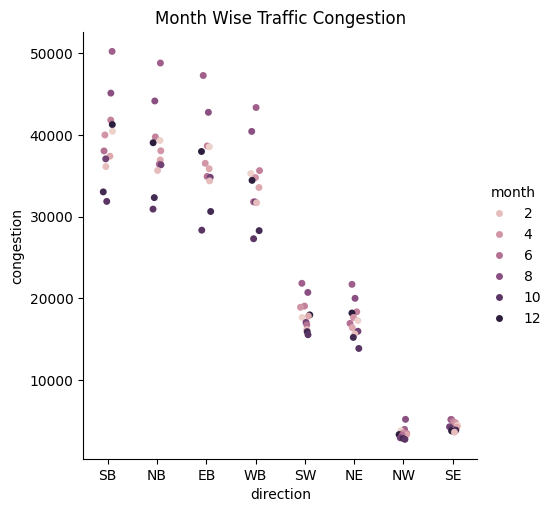

In [9]:
data = dataset.groupby(['direction', 'month'])['congestion'].sum().sort_values(ascending=False).reset_index()
sns.catplot(x="direction", y="congestion", hue='month', data=data)
plt.title("Month Wise Traffic Congestion")
plt.show()

In [10]:
#applying label encoder to convert all non-numeric data to numeric values
labels, count = np.unique(dataset['direction'], return_counts=True)
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
dataset['weather_main'] = pd.Series(encoder1.fit_transform(dataset['weather_main'].astype(str)))#encode all str columns to numeric 
dataset['weather_description'] = pd.Series(encoder2.fit_transform(dataset['weather_description'].astype(str)))#encode all str columns to numeric
dataset['direction'] = pd.Series(encoder3.fit_transform(dataset['direction'].astype(str)))#encode all str columns to numeric 
dataset.drop(['date_time'], axis = 1,inplace=True)
dataset

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,x,y,direction,congestion,year,month,day,hour,minute,second
0,288.28,0.0,0.0,40,1,24,0,0,0,70,2012,10,2,9,0,0
1,289.36,0.0,0.0,75,1,2,0,0,1,49,2012,10,2,10,0,0
2,289.58,0.0,0.0,90,1,19,0,0,4,24,2012,10,2,11,0,0
3,290.13,0.0,0.0,90,1,19,0,1,0,18,2012,10,2,12,0,0
4,291.14,0.0,0.0,75,1,2,0,1,1,60,2012,10,2,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,1,2,1,3,1,58,2018,9,30,19,0,0
48200,282.76,0.0,0.0,90,1,19,1,3,2,50,2018,9,30,20,0,0
48201,282.73,0.0,0.0,90,10,21,1,3,4,63,2018,9,30,21,0,0
48202,282.09,0.0,0.0,90,1,19,1,3,6,34,2018,9,30,22,0,0


In [11]:
#dataset preprocessing and normalization
Y = dataset['direction'].ravel()
dataset.drop(['direction'], axis = 1,inplace=True)
X = dataset.values
sc1 = MinMaxScaler(feature_range = (0, 1))
X = sc1.fit_transform(X)#normalize train features
#split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset = "+str(X.shape[1]))
print("80% dataset for training : "+str(X_train.shape[0]))
print("20% dataset for testing  : "+str(X_test.shape[0]))
X_train, X_test1, y_train, y_test1 = train_test_split(X, Y, test_size = 0.1)

Total records found in dataset = 48204
Total features found in dataset = 15
80% dataset for training : 38563
20% dataset for testing  : 9641


In [12]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [13]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    conf_matrix = confusion_matrix(testY, predict)
    fig, axs = plt.subplots(1,2,figsize=(10, 4))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g", ax=axs[0]);
    ax.set_ylim([0,len(labels)])
    axs[0].set_title(algorithm+" Confusion matrix") 

    random_probs = [0 for i in range(len(testY))]
    p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='orange',label="True classes")
    ns_fpr, ns_tpr, _ = roc_curve(testY, predict, pos_label=1)
    axs[1].plot(ns_tpr, ns_fpr, linestyle='--', label='Predicted Classes')
    axs[1].set_title(algorithm+" ROC AUC Curve")
    axs[1].set_xlabel('False Positive Rate')
    axs[1].set_ylabel('True Positive rate')
    plt.show()

SVM Accuracy  : 31.262317187013792
SVM Precision : 32.5112946350674
SVM Recall    : 31.115581407128
SVM FSCORE    : 29.63307866458498


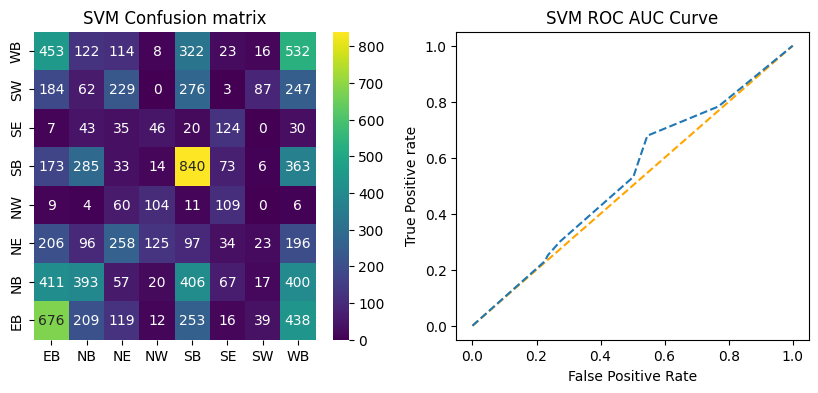

In [14]:
#train machine learning SVM algorithm to predict route with less traffic
svm_cls = svm.SVC()
svm_cls.fit(X_train, y_train)
predict = svm_cls.predict(X_test)
calculateMetrics("SVM", y_test, predict)

Decision Tree Accuracy  : 94.02551602530858
Decision Tree Precision : 94.69452977277564
Decision Tree Recall    : 94.67747317371952
Decision Tree FSCORE    : 94.68340908725507


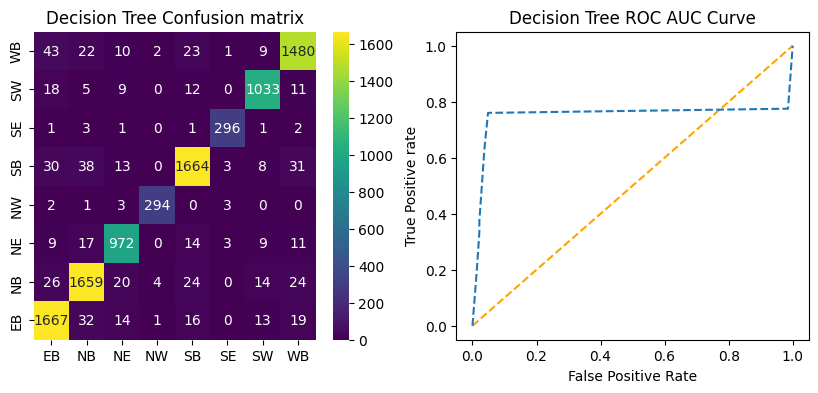

In [15]:
#train machine learning Decision Tree algorithm to predict route with less traffic
dt_cls = DecisionTreeClassifier()
dt_cls.fit(X_train, y_train)
#perform prediction on test data
predict = dt_cls.predict(X_test)
#calculate prediction accuracy and other metrics
calculateMetrics("Decision Tree", y_test, predict)

Random Forest Accuracy  : 94.03588839332019
Random Forest Precision : 94.75235573471141
Random Forest Recall    : 94.68542010886058
Random Forest FSCORE    : 94.71806969845532


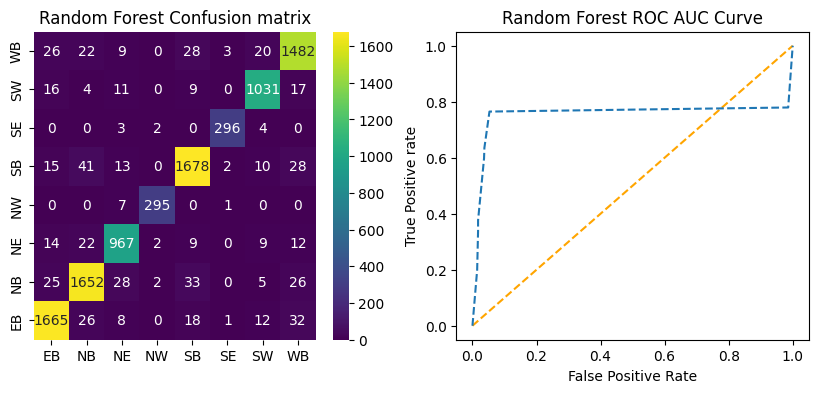

In [16]:
#train machine learning Random Forest algorithm to predict route with less traffic
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train, y_train)
#perform prediction on test data
predict = rf_cls.predict(X_test)
#calculate prediction accuracy and other metrics
calculateMetrics("Random Forest", y_test, predict)